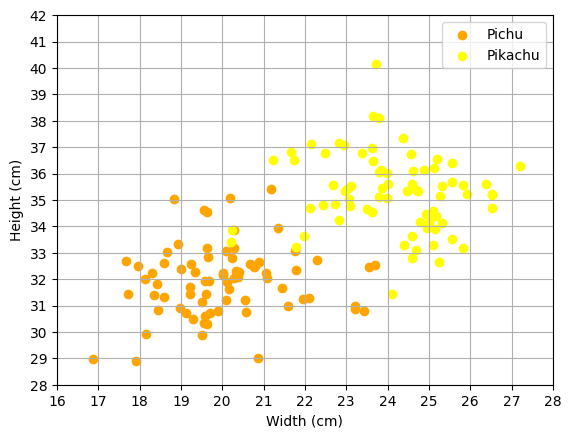

Sample (25.0, 32.0) classified as Pikachu
Sample (24.2, 31.5) classified as Pikachu
Sample (22.0, 34.0) classified as Pikachu
Sample (20.5, 34.0) classified as Pichu


In [ ]:
import math as mt
import matplotlib.pyplot as plt

# --- Läsa in datapunkter ---
datapokemon_file = "datapoints.txt"
widths, heights, labels = [], [], []

with open(datapokemon_file, "r") as f:
    for line in f:
        if line.startswith("("):
            continue
        parts = line.strip().split(",")
        widths.append(float(parts[0]))
        heights.append(float(parts[1]))
        labels.append(int(parts[2]))

# --- Separera data per Pokémon-typ ---
pichu_widths, pichu_heights = [], []
pikachu_widths, pikachu_heights = [], []

for i, label in enumerate(labels):
    if label == 0:
        pichu_widths.append(widths[i])
        pichu_heights.append(heights[i])
    else:
        pikachu_widths.append(widths[i])
        pikachu_heights.append(heights[i])

# --- Plot av Pokémon-data ---
plt.scatter(pichu_widths, pichu_heights, color="orange", label="Pichu")
plt.scatter(pikachu_widths, pikachu_heights, color="yellow", label="Pikachu")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.xticks(range(16, 29))
plt.yticks(range(28, 43))
plt.legend()
plt.grid(True)
plt.show()

# --- Funktion för Euklidiskt avstånd ---
def euclidean_distance(x1, x2, y1, y2):
    return mt.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# --- Klassificera testpunkter ---
test_file = "testpoints.txt"

with open(test_file, "r") as f:
    for line in f:
        if line.startswith("T"):
            continue
        # Rensa strängen och skapa testpunkten
        cleaned = line.strip().replace("(", "").replace(")", "").replace(",", "")
        parts = cleaned.split()
        test_width = float(parts[1])
        test_height = float(parts[2])

        # Hitta närmaste datapunkt
        nearest_distance = float("inf")
        nearest_label = None
        for i in range(len(widths)):
            dist = euclidean_distance(test_width, widths[i], test_height, heights[i])
            if dist < nearest_distance:
                nearest_distance = dist
                nearest_label = labels[i]

        # Skriv ut klassificering
        if nearest_label == 0:
            print(f"Sample ({test_width}, {test_height}) classified as Pichu")
        else:
            print(f"Sample ({test_width}, {test_height}) classified as Pikachu")

# --- Användarinmatning för klassificering ---
def user_input_pokemon_data(nearest_points):
    pokemon_list = []
    while True:
        user_choice = input("Wanna find out which Pokémon you got? (y/n) ")
        if user_choice.lower() != "y":
            print("You're not a Pokémon fan, Goodbye!")
            return

        try:
            user_width = float(input("Enter Pokémon width: "))
            user_height = float(input("Enter Pokémon height: "))
            if user_width <= 0 or user_height <= 0:
                raise ValueError("Width and Height must be positive numbers.")

            # Beräkna avstånd till alla datapunkter
            for i in range(len(widths)):
                dist = euclidean_distance(user_width, widths[i], user_height, heights[i])
                pokemon_list.append((dist, labels[i]))
            break
        except ValueError as e:
            print(f"Input error: {e}. Please enter positive numbers.")

    # Sortera avstånd och ta de närmaste punkterna
    sorted_list = sorted(pokemon_list)[:nearest_points]

    # Räkna majoritet
    pichu_count = sum(1 for _, label in sorted_list if label == 0)
    pikachu_count = sum(1 for _, label in sorted_list if label == 1)

    if pichu_count >= pikachu_count:
        pokemon_type = "Pichu"
    else:
        pokemon_type = "Pikachu"

    print(f"Your input ({user_width}, {user_height}) with {nearest_points} nearest point(s) classified as {pokemon_type}")

# --- Fråga användaren hur många närmaste punkter som ska användas ---
while True:
    try:
        nearest_points = int(input("How many nearest point(s) do you want to use? "))
        if nearest_points <= 0:
            raise ValueError("Must be a positive integer.")
        user_input_pokemon_data(nearest_points)
        break
    except ValueError as e:
        print(f"Input error: {e}")